In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

Vision Function    

In [2]:
def simple_image(image_path):
    image = cv2.imread(image_path)
    N_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    return N_image

In [3]:
def threshold_vision(image_path):
    image = simple_image(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _,threshold_image = cv2.threshold(gray_image,90,255,cv2.THRESH_BINARY_INV)
    return threshold_image

In [4]:
def canny_vision(image_path):
    Threshold_image = threshold_vision(image_path)
    Canny_image = cv2.Canny(Threshold_image,10,100)
    return Canny_image

In [5]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_image(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img

## Checking

Simple Vision

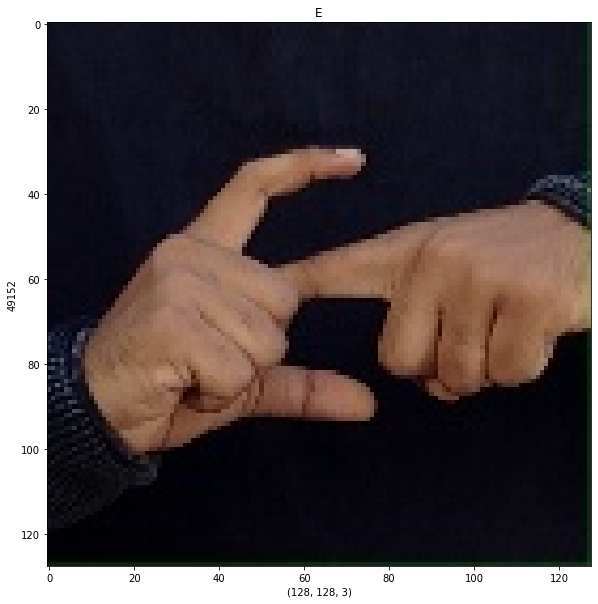

In [6]:
figure = plt.figure(figsize = (10,10))
test_image = simple_image('vision_test.jpg')
plt.xlabel(test_image.shape)
plt.ylabel(test_image.size)
plt.title('E')
plt.imshow(test_image)

Threshold Vision

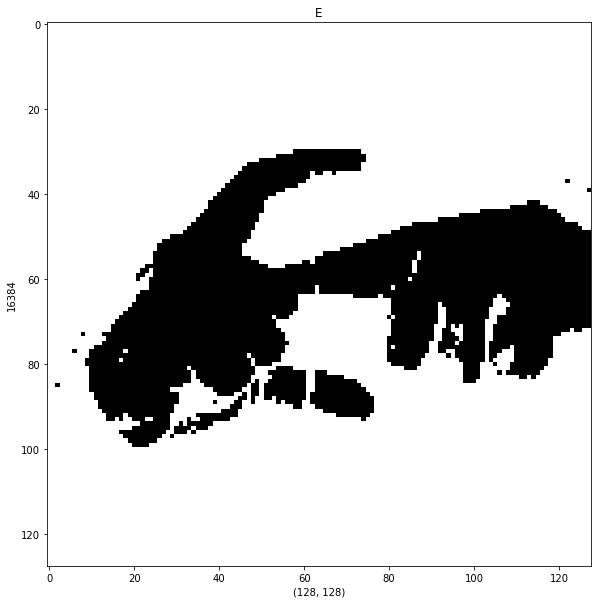

In [7]:
figure = plt.figure(figsize = (10,10))
test_image = threshold_vision('vision_test.jpg')
plt.xlabel(test_image.shape)
plt.ylabel(test_image.size)
plt.title('E')
plt.imshow(test_image, cmap = "gray")

Hessian matrix

Text(0.5, 1.0, 'vision_test.jpg')

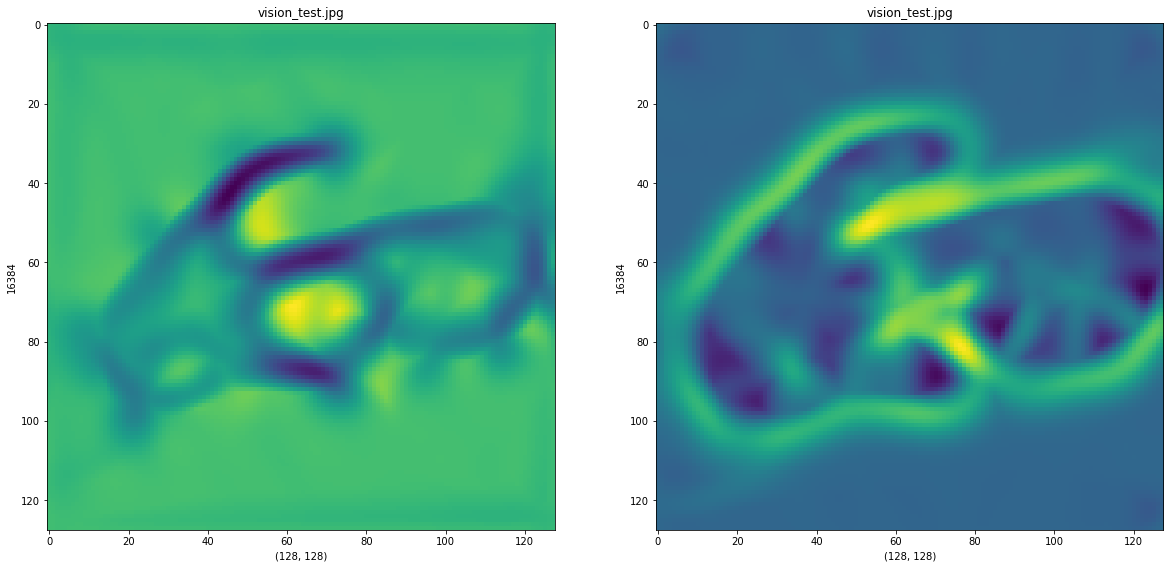

In [8]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread("vision_test.jpg"),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title("vision_test.jpg")
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title("vision_test.jpg")

Canny Vision

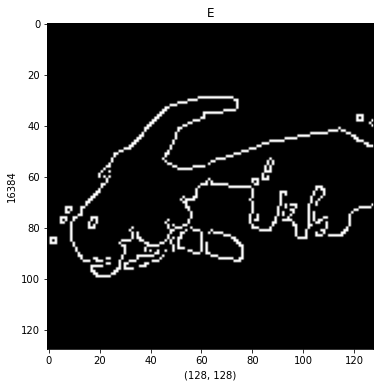

In [12]:
figure = plt.figure(figsize = (6,6))
test_image = canny_vision('vision_test.jpg')
plt.xlabel(test_image.shape)
plt.ylabel(test_image.size)
plt.title('E')
plt.imshow(test_image, cmap = "gray")

skeleton morph vision

Text(0.5, 1.0, 'vision_test.jpg')

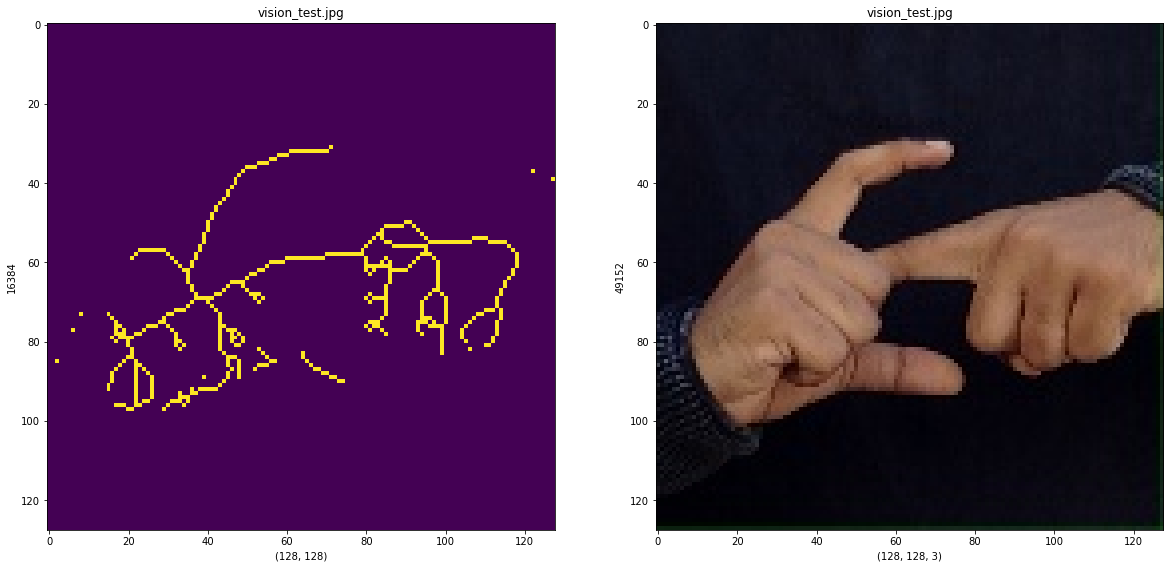

In [10]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision("vision_test.jpg")
Simple_Img = simple_image("vision_test.jpg")

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title("vision_test.jpg")
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title("vision_test.jpg")